In [1]:
pwd

'/Users/ki/Desktop/capstone_projectData/VBM_Rejection_Factors/Khamanna'

In [2]:
cd C:\Users\Aidan\Documents\VBM_OPRA_Data\vbm_data

[Errno 2] No such file or directory: 'C:UsersAidanDocumentsVBM_OPRA_Datavbm_data'
/Users/ki/Desktop/capstone_projectData/VBM_Rejection_Factors/Khamanna


In [3]:
import pandas as pd
pd.set_option("display.max_columns", None) 

In [4]:
raw_df = pd.read_csv('../../vbm12.6.20.csv', low_memory=False)

In [5]:
raw_df

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
0,Atlantic,Absecon City,01,1.0,Single Election,P2763351335,LINGELBACH,CAROLYN,R,NaN,Unaffiliated,Active,Regular,Atlantic,Absecon City,01,1,Unaffiliated,122 E Faunce Landing Rd,NaN,NaN,Absecon,NJ,08201-1808,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/23/2020,11/20/2020,Accepted,NaN,122,E Faunce Landing Rd,122 E Faunce Landing Rd,NaN,NaN,Absecon,NJ,08201-1808,NaN,NaN,NaN
1,Atlantic,Absecon City,01,1.0,Annual Mail-In Elections,P3919851339,TIMMS,BRIAN,D,NaN,Democratic,Active,Presidential / Removed Resident,Atlantic,Absecon City,01,1,Democratic,506 Lazy Ln,NaN,NaN,Absecon,NJ,08201-1337,US,08/26/2020,08/26/2020,Accepted,09/21/2020,10/21/2020,11/20/2020,Accepted,NaN,506,Lazy Ln,506 Lazy Ln,NaN,NaN,Absecon,NJ,08201-1337,8609447558,BIBLIOMANE74@GMAIL.COM,NaN
2,Atlantic,Absecon City,01,1.0,Single Election,P6095651352,CUSHLANIS,ROBIN,A,NaN,Republican,Active,Regular,Atlantic,Absecon City,01,1,Republican,645 Weilers Ln,NaN,NaN,Absecon,NJ,08201-1326,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/18/2020,11/20/2020,Accepted,NaN,645,Weilers Ln,645 Weilers Ln,NaN,NaN,Absecon,NJ,08201-1326,6093284677,NaN,NaN
3,Atlantic,Absecon City,01,1.0,Single Election,A1425851358,DILLHOFF,KEVIN,T,NaN,Democratic,Active,Regular,Atlantic,Absecon City,01,1,Democratic,635 4th St,NaN,NaN,Absecon,NJ,08201-1304,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,NaN,11/20/2020,Accepted,NaN,635,4th St,635 4th St,NaN,NaN,Absecon,NJ,08201-1304,NaN,KEVINDILLHOFF@GMAIL.COM,NaN
4,Atlantic,Absecon City,01,1.0,Single Election,A1783751359,JETER,PAUL,D,NaN,Democratic,Active,Regular,Atlantic,Absecon City,01,1,Democratic,511 LAZY LN,NaN,NaN,ABSECON,NJ,08201-1338,US,08/14/2020,08/31/2020,Accepted,09/21/2020,NaN,11/20/2020,Accepted,NaN,511,LAZY LN,511 LAZY LN,NaN,NaN,ABSECON,NJ,08201-1338,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047961,Warren,White Township,00,6.0,Single Election,L1061243339,COWLEY,JARED,DUANE,Jr.,Democratic,Active,Regular,Warren,White Township,00,6,Democratic,96 BUCKHORN DR,NaN,NaN,WASHINGTON,NJ,07882-3805,US,08/14/2020,10/19/2020,Accepted,10/21/2020,11/03/2020,11/23/2020,Accepted,NaN,96,BUCKHORN DR,96 BUCKHORN DR,NaN,NaN,WASHINGTON,NJ,07882-3805,NaN,NaN,NaN
6047962,Warren,White Township,00,6.0,Single Election,C2754450078,WELENOFSKY,LISA,JEAN,NaN,Unaffiliated,Active,Regular,Warren,White Township,00,6,Unaffiliated,25 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,US,08/14/2020,10/19/2020,Accepted,10/21/2020,10/28/2020,11/23/2020,Accepted,NaN,25,COLBY CT,25 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,NaN,NaN,NaN
6047963,Warren,White Township,00,6.0,Single Election,H4507252594,MCGINLEY,MEGHAN,NaN,NaN,Unaffiliated,Active,Regular,Warren,White Township,00,6,Unaffiliated,23 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,US,08/14/2020,10/19/2020,Accepted,10/21/2020,10/27/2020,11/23/2020,Accepted,NaN,23,COLBY CT,23 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,NaN,NaN,NaN
6047964,Warren,White Township,00,6.0,Single Election,N4444001342,CARMEN,KOI,LEA,NaN,Unaffiliated,Active,Regular,Warren,White Township,00,6,Unaffiliated,835 BRASS CASTLE RD,NaN,NaN,BELVIDERE,NJ,07823-2724,US,0

In [6]:
#number of rejected ballots

raw_df['received_rejReason'].count()

46998

In [7]:
#rejected ballots by reason for rejection

raw_df['received_rejReason'].value_counts()

Signature Does Not Match          15047
Certificate Missing               11096
Certificate Not Signed             8379
Other                              6661
Ballot Received After Deadline     2007
Ballot Not Enclosed                1593
Voter Registration ID Missing       953
Bearer Exceeded Limit               751
Incomplete Bearer Portion           200
Moved Out of County                 200
Incomplete Assistor Portion          54
Power of Attorney                    36
Ineligible Voter Status               6
Both Envelopes Unsealed               5
Bearer Book Not Signed In             3
Primary-Voted Both Parties            3
One Envelope Unsealed                 2
Candidate Provided Assistance         2
Name: received_rejReason, dtype: int64

In [8]:
#NA's in Rejection reason should represent accepted ballots AND people who did not vote

raw_df['received_rejReason'].isna().sum()

6000968

In [9]:
print(raw_df['ballot_receivedDate'].unique())

['10/23/2020' '10/21/2020' '10/18/2020' nan '10/28/2020' '10/19/2020'
 '10/22/2020' '10/16/2020' '10/24/2020' '10/29/2020' '10/20/2020'
 '11/03/2020' '10/26/2020' '10/15/2020' '10/17/2020' '10/27/2020'
 '10/30/2020' '11/04/2020' '11/02/2020' '10/25/2020' '10/31/2020'
 '11/01/2020' '11/12/2020' '11/10/2020' '10/05/2020' '11/05/2020'
 '11/06/2020' '10/10/2020' '10/07/2020' '10/09/2020' '10/08/2020'
 '10/06/2020' '10/14/2020' '10/13/2020' '10/12/2020' '10/03/2020'
 '09/29/2020' '10/01/2020' '09/30/2020' '10/04/2020' '10/11/2020'
 '10/02/2020' '11/07/2020' '11/09/2020' '09/22/2020' '11/16/2020'
 '11/14/2020' '11/17/2020' '11/13/2020' '09/09/2020' '09/28/2020'
 '09/02/2020' '11/11/2020' '11/23/2020' '11/20/2020' '09/21/2020'
 '09/24/2020' '09/20/2020' '09/25/2020' '09/05/2020' '08/30/2020'
 '09/14/2020' '09/18/2020' '09/27/2020' '09/04/2020' '09/17/2020'
 '09/23/2020' '09/26/2020' '09/16/2020' '11/08/2020' '09/15/2020'
 '09/12/2020' '09/06/2020' '11/19/2020' '11/18/2020' '12/01/2020'
 '09/1

In [10]:
#Some voters/voter ID's are duplicated in the report:

raw_df['voter_id'].value_counts()

E1576352907    7
N4349817779    6
J0202453381    4
B2974435149    4
O2854653146    4
              ..
N3609152372    1
L2805152715    1
E5618852921    1
F6503652946    1
N5911651661    1
Name: voter_id, Length: 6032030, dtype: int64

In [11]:
#Let's take the most extreme example and see what's going on:

top_dup = raw_df.loc[raw_df['voter_id'] == 'E1576352907']
top_dup

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
4978398,Passaic,Clifton City,02,8.0,Single Election,E1576352907,BASHJAWISH,FUAD,A,NaN,Republican,Active,Regular,Passaic,Clifton City,02,8,Democratic,117 Mountainside Ter,NaN,NaN,Clifton,NJ,07013-1178,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,117,MOUNTAINSIDE TER,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,9732472453,NaN,NaN
4978399,Passaic,Clifton City,02,8.0,Single Election,E1576352907,BASHJAWISH,FUAD,A,NaN,Republican,Active,Regular,Passaic,Clifton City,02,8,Republican,117 Mountainside Ter,NaN,NaN,Clifton,NJ,07013-1178,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,117,MOUNTAINSIDE TER,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,9732472453,NaN,NaN
4978400,Passaic,Clifton City,02,8.0,Single Election,E1576352907,BASHJAWISH,FUAD,A,NaN,Republican,Active,Regular,Passaic,Clifton City,02,8,Republican,117 Mountainside Ter,NaN,NaN,Clifton,NJ,07013-1178,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,117,MOUNTAINSIDE TER,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,9732472453,NaN,NaN
4978401,Passaic,Clifton City,02,8.0,Single Election,E1576352907,BASHJAWISH,FUAD,A,NaN,Republican,Active,Regular,Passaic,Clifton City,02,8,Republican,117 Mountainside Ter,NaN,NaN,Clifton,NJ,07013-1178,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,117,MOUNTAINSIDE TER,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,9732472453,NaN,NaN
4978402,Passaic,Clifton City,02,8.0,Single Election,E1576352907,BASHJAWISH,FUAD,A,NaN,Republican,Active,Regular,Passaic,Clifton City,02,8,Republican,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,US,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,117,MOUNTAINSIDE TER,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,9732472453,NaN,NaN
4978403,Passaic,Clifton City,02,8.0,Single Election,E1576352907,BASHJAWISH,FUAD,A,NaN,Republican,Active,Regular,Passaic,Clifton City,02,8,Republican,117 Mountainside Ter,NaN,NaN,Clifton,NJ,07013-1178,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,117,MOUNTAINSIDE TER,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,9732472453,NaN,NaN
4978404,Passaic,Clifton City,02,8.0,Single Election,E1576352907,BASHJAWISH,FUAD,A,NaN,Republican,Active,Regular,Passaic,Clifton City,02,8,Republican,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,US,08/14/2020,08/31/2020,Accepted,10/06/2020,NaN,NaN,NaN,NaN,117,MOUNTAINSIDE TER,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,9732472453,NaN,NaN


In [12]:
#It looks like they're identical records, some with lowercase cols and some with uppercase cols

#In this instace, it looks like the last row is the one we want to keep bc it contains the ballot mailed date

In [13]:
#let's see if that holds true for a few more examples

dup_2 = raw_df.loc[raw_df['voter_id'] == 'N4349817779']
dup_2

#Yes, want to keep the last row

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
5014508,Passaic,Little Falls Township,00,8.0,Single Election,N4349817779,DEFEO,EMMA,L,NaN,Unaffiliated,Active,Regular,Passaic,Little Falls Township,00,8,Unaffiliated,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,US,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,88,BERGEN DR,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,NaN,NaN,NaN
5014509,Passaic,Little Falls Township,00,8.0,Single Election,N4349817779,DEFEO,EMMA,L,NaN,Unaffiliated,Active,Regular,Passaic,Little Falls Township,00,8,Republican,88 Bergen Dr,NaN,NaN,Little Falls,NJ,07424-1342,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,88,BERGEN DR,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,NaN,NaN,NaN
5014510,Passaic,Little Falls Township,00,8.0,Single Election,N4349817779,DEFEO,EMMA,L,NaN,Unaffiliated,Active,Regular,Passaic,Little Falls Township,00,8,Republican,88 Bergen Dr,NaN,NaN,Little Falls,NJ,07424-1342,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,88,BERGEN DR,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,NaN,NaN,NaN
5014511,Passaic,Little Falls Township,00,8.0,Single Election,N4349817779,DEFEO,EMMA,L,NaN,Unaffiliated,Active,Regular,Passaic,Little Falls Township,00,8,Unaffiliated,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,US,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,88,BERGEN DR,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,NaN,NaN,NaN
5014512,Passaic,Little Falls Township,00,8.0,Single Election,N4349817779,DEFEO,EMMA,L,NaN,Unaffiliated,Active,Regular,Passaic,Little Falls Township,00,8,Republican,88 Bergen Dr,NaN,NaN,Little Falls,NJ,07424-1342,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,88,BERGEN DR,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,NaN,NaN,NaN
5014513,Passaic,Little Falls Township,00,8.0,Single Election,N4349817779,DEFEO,EMMA,L,NaN,Unaffiliated,Active,Regular,Passaic,Little Falls Township,00,8,Unaffiliated,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,US,08/14/2020,08/31/2020,Accepted,10/06/2020,11/02/2020,11/24/2020,Accepted,NaN,88,BERGEN DR,88 BERGEN DR,NaN,NaN,LITTLE FALLS,NJ,07424-1342,NaN,NaN,NaN


In [14]:
dup_3 = raw_df.loc[raw_df['voter_id'] == 'C2833253992']
dup_3

#Same again

#IMPORTANT: the ballot types differ -- top = regular, the rest are "Presidential / Removed Resident"

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
185339,Bergen,Allendale Borough,00,1.0,Single Election,C2833253992,CALIANESE,JOSEPH,T,NaN,Republican,Active,Regular,Bergen,Allendale Borough,00,1,Republican,68 Canaan Pl,NaN,NaN,Allendale,NJ,07401-1820,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,68,Canaan Pl,68 Canaan Pl,NaN,NaN,Allendale,NJ,07401-1820,NaN,NaN,NaN
185340,Bergen,Allendale Borough,00,1.0,Annual Mail-In Elections,C2833253992,CALIANESE,JOSEPH,T,NaN,Republican,Active,Presidential / Removed Resident,Bergen,Allendale Borough,00,1,Republican,68 CANAAN PL,NaN,NaN,ALLENDALE,NJ,07401-1820,US,09/04/2020,09/04/2020,Accepted,NaN,NaN,NaN,NaN,NaN,68,Canaan Pl,68 Canaan Pl,NaN,NaN,Allendale,NJ,07401-1820,NaN,NaN,NaN
185341,Bergen,Allendale Borough,00,1.0,Annual Mail-In Elections,C2833253992,CALIANESE,JOSEPH,T,NaN,Republican,Active,Presidential / Removed Resident,Bergen,Allendale Borough,00,1,Republican,68 CANAAN PL,NaN,NaN,ALLENDALE,NJ,07401-1820,US,09/04/2020,09/04/2020,Accepted,NaN,NaN,NaN,NaN,NaN,68,Canaan Pl,68 Canaan Pl,NaN,NaN,Allendale,NJ,07401-1820,NaN,NaN,NaN
185342,Bergen,Allendale Borough,00,1.0,Annual Mail-In Elections,C2833253992,CALIANESE,JOSEPH,T,NaN,Republican,Active,Presidential / Removed Resident,Bergen,Allendale Borough,00,1,Republican,68 CANAAN PL,NaN,NaN,ALLENDALE,NJ,07401-1820,US,09/04/2020,09/04/2020,Accepted,09/21/2020,10/31/2020,12/02/2020,Accepted,NaN,68,Canaan Pl,68 Canaan Pl,NaN,NaN,Allendale,NJ,07401-1820,NaN,NaN,NaN


In [15]:
dup_4 = raw_df.loc[raw_df['voter_id'] == 'P3690153923']
dup_4

# Same as above -- last row has dates, but rows have different ballot types AND addresses
# It looks like this one is because they got an overseas ballot

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
1171547,Camden,Berlin Borough,00,3.0,Single Election,P3690153923,SCOTT,SUSAN,L,NaN,Unaffiliated,Active,Regular,Camden,Berlin Borough,00,3,Unaffiliated,32 Mason Dr,NaN,NaN,Berlin,NJ,08009-7116,NaN,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,32,Mason Dr,32 Mason Dr,NaN,NaN,Berlin,NJ,08009-7116,NaN,SUSANLEESCOTTNYC@GMAIL.COM,NaN
1171548,Camden,Berlin Borough,00,3.0,UOCAVA Annual Mail-In Elections,P3690153923,SCOTT,SUSAN,L,NaN,Unaffiliated,Active,Full,Camden,Berlin Borough,00,3,Unaffiliated,HORIZON TOWER - 214 TRAN QUANG KHAI,APT 23.03 TAN DINH,NaN,HO CHI MINH CITY,NaN,70000-7400,VN,09/08/2020,09/08/2020,Accepted,NaN,NaN,NaN,NaN,NaN,32,Mason Dr,32 Mason Dr,NaN,NaN,Berlin,NJ,08009-7116,NaN,SUSANLEESCOTTNYC@GMAIL.COM,NaN
1171549,Camden,Berlin Borough,00,3.0,Annual Mail-In Elections,P3690153923,SCOTT,SUSAN,L,NaN,Unaffiliated,Active,Presidential / Removed Resident,Camden,Berlin Borough,00,3,Unaffiliated,32 Mason Dr,NaN,NaN,Berlin,NJ,08009-7116,NaN,09/09/2020,09/09/2020,Accepted,NaN,NaN,NaN,NaN,NaN,32,Mason Dr,32 Mason Dr,NaN,NaN,Berlin,NJ,08009-7116,NaN,SUSANLEESCOTTNYC@GMAIL.COM,NaN
1171550,Camden,Berlin Borough,00,3.0,UOCAVA Annual Mail-In Elections,P3690153923,SCOTT,SUSAN,L,NaN,Unaffiliated,Active,Full,Camden,Berlin Borough,00,3,Unaffiliated,HORIZON TOWER - 214 TRAN QUANG KHAI,APT 23.03 TAN DINH,NaN,HO CHI MINH CITY,NaN,70000-7400,VN,09/19/2020,09/19/2020,Accepted,09/19/2020,11/01/2020,11/19/2020,Accepted,NaN,32,Mason Dr,32 Mason Dr,NaN,NaN,Berlin,NJ,08009-7116,NaN,SUSANLEESCOTTNYC@GMAIL.COM,NaN


In [16]:
dup_5 = raw_df.loc[raw_df['voter_id'] == 'P3101208027']
dup_5

#Same as before -- some inconsistencies across duplicates but keep the bottom row

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
4694862,Ocean,Lakehurst Borough,00,1.0,Single Election,P3101208027,NAGLE,SPRING,A,NaN,Republican,Active,Regular,Ocean,Lakehurst Borough,00,1,Republican,121 BROWN AVE,NaN,NaN,LAKEHURST,NJ,08733-3032,US,08/14/2020,08/31/2020,Accepted,NaN,NaN,NaN,NaN,NaN,121,BROWN AVE,121 BROWN AVE,NaN,NaN,LAKEHURST,NJ,08733-3032,NaN,NaN,NaN
4694863,Ocean,Lakehurst Borough,00,1.0,Annual Mail-In Elections,P3101208027,NAGLE,SPRING,A,NaN,Republican,Active,Presidential / Removed Resident,Ocean,Lakehurst Borough,00,1,Republican,121 BROWN AVE,NaN,NaN,LAKEHURST,NJ,08733-3032,US,09/02/2020,09/02/2020,Accepted,NaN,NaN,NaN,NaN,NaN,121,BROWN AVE,121 BROWN AVE,NaN,NaN,LAKEHURST,NJ,08733-3032,NaN,NaN,NaN
4694864,Ocean,Lakehurst Borough,00,1.0,Single Election,P3101208027,NAGLE,SPRING,A,NaN,Republican,Active,Regular,Ocean,Lakehurst Borough,00,1,Republican,P.O. BOX 1104,NaN,NaN,BRICK,NJ,08723,US,09/04/2020,09/04/2020,Accepted,NaN,NaN,NaN,NaN,NaN,121,BROWN AVE,121 BROWN AVE,NaN,NaN,LAKEHURST,NJ,08733-3032,NaN,NaN,NaN
4694865,Ocean,Lakehurst Borough,00,1.0,Annual Mail-In Elections,P3101208027,NAGLE,SPRING,A,NaN,Republican,Active,Presidential / Removed Resident,Ocean,Lakehurst Borough,00,1,Republican,P.O. BOX 1104,NaN,NaN,BRICK,NJ,08723,US,09/11/2020,09/11/2020,Accepted,09/19/2020,10/05/2020,NaN,Received,NaN,121,BROWN AVE,121 BROWN AVE,NaN,NaN,LAKEHURST,NJ,08733-3032,NaN,NaN,NaN


In [17]:
#testing drop_duplicates to make sure it keps the right row

top_dup_no_dups = top_dup.drop_duplicates(subset=['voter_id'], keep='last')
top_dup_no_dups

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
4978404,Passaic,Clifton City,02,8.0,Single Election,E1576352907,BASHJAWISH,FUAD,A,NaN,Republican,Active,Regular,Passaic,Clifton City,02,8,Republican,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,US,08/14/2020,08/31/2020,Accepted,10/06/2020,NaN,NaN,NaN,NaN,117,MOUNTAINSIDE TER,117 MOUNTAINSIDE TER,NaN,NaN,CLIFTON,NJ,07013-1178,9732472453,NaN,NaN


In [18]:
#That worked. Let's apply this to the full dataset now 


df = raw_df.drop_duplicates(subset=['voter_id'], keep='last')

In [19]:
df

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
0,Atlantic,Absecon City,01,1.0,Single Election,P2763351335,LINGELBACH,CAROLYN,R,NaN,Unaffiliated,Active,Regular,Atlantic,Absecon City,01,1,Unaffiliated,122 E Faunce Landing Rd,NaN,NaN,Absecon,NJ,08201-1808,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/23/2020,11/20/2020,Accepted,NaN,122,E Faunce Landing Rd,122 E Faunce Landing Rd,NaN,NaN,Absecon,NJ,08201-1808,NaN,NaN,NaN
1,Atlantic,Absecon City,01,1.0,Annual Mail-In Elections,P3919851339,TIMMS,BRIAN,D,NaN,Democratic,Active,Presidential / Removed Resident,Atlantic,Absecon City,01,1,Democratic,506 Lazy Ln,NaN,NaN,Absecon,NJ,08201-1337,US,08/26/2020,08/26/2020,Accepted,09/21/2020,10/21/2020,11/20/2020,Accepted,NaN,506,Lazy Ln,506 Lazy Ln,NaN,NaN,Absecon,NJ,08201-1337,8609447558,BIBLIOMANE74@GMAIL.COM,NaN
2,Atlantic,Absecon City,01,1.0,Single Election,P6095651352,CUSHLANIS,ROBIN,A,NaN,Republican,Active,Regular,Atlantic,Absecon City,01,1,Republican,645 Weilers Ln,NaN,NaN,Absecon,NJ,08201-1326,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/18/2020,11/20/2020,Accepted,NaN,645,Weilers Ln,645 Weilers Ln,NaN,NaN,Absecon,NJ,08201-1326,6093284677,NaN,NaN
3,Atlantic,Absecon City,01,1.0,Single Election,A1425851358,DILLHOFF,KEVIN,T,NaN,Democratic,Active,Regular,Atlantic,Absecon City,01,1,Democratic,635 4th St,NaN,NaN,Absecon,NJ,08201-1304,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,NaN,11/20/2020,Accepted,NaN,635,4th St,635 4th St,NaN,NaN,Absecon,NJ,08201-1304,NaN,KEVINDILLHOFF@GMAIL.COM,NaN
4,Atlantic,Absecon City,01,1.0,Single Election,A1783751359,JETER,PAUL,D,NaN,Democratic,Active,Regular,Atlantic,Absecon City,01,1,Democratic,511 LAZY LN,NaN,NaN,ABSECON,NJ,08201-1338,US,08/14/2020,08/31/2020,Accepted,09/21/2020,NaN,11/20/2020,Accepted,NaN,511,LAZY LN,511 LAZY LN,NaN,NaN,ABSECON,NJ,08201-1338,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047961,Warren,White Township,00,6.0,Single Election,L1061243339,COWLEY,JARED,DUANE,Jr.,Democratic,Active,Regular,Warren,White Township,00,6,Democratic,96 BUCKHORN DR,NaN,NaN,WASHINGTON,NJ,07882-3805,US,08/14/2020,10/19/2020,Accepted,10/21/2020,11/03/2020,11/23/2020,Accepted,NaN,96,BUCKHORN DR,96 BUCKHORN DR,NaN,NaN,WASHINGTON,NJ,07882-3805,NaN,NaN,NaN
6047962,Warren,White Township,00,6.0,Single Election,C2754450078,WELENOFSKY,LISA,JEAN,NaN,Unaffiliated,Active,Regular,Warren,White Township,00,6,Unaffiliated,25 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,US,08/14/2020,10/19/2020,Accepted,10/21/2020,10/28/2020,11/23/2020,Accepted,NaN,25,COLBY CT,25 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,NaN,NaN,NaN
6047963,Warren,White Township,00,6.0,Single Election,H4507252594,MCGINLEY,MEGHAN,NaN,NaN,Unaffiliated,Active,Regular,Warren,White Township,00,6,Unaffiliated,23 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,US,08/14/2020,10/19/2020,Accepted,10/21/2020,10/27/2020,11/23/2020,Accepted,NaN,23,COLBY CT,23 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,NaN,NaN,NaN
6047964,Warren,White Township,00,6.0,Single Election,N4444001342,CARMEN,KOI,LEA,NaN,Unaffiliated,Active,Regular,Warren,White Township,00,6,Unaffiliated,835 BRASS CASTLE RD,NaN,NaN,BELVIDERE,NJ,07823-2724,US,0

In [20]:
#Amount of duplicate records removed:

6047966 - 6032030

15936

In [21]:
# Now let's look at the (hopefully more accurate) numbers we calculated earlier:

df['received_rejReason'].count()

46988

In [22]:
# Number of rejected ballots only changed by ten. 
# This tracks with what we saw above:
#    most duplicate rows appeared not to be associated with a sent/returned ballot

In [23]:
#rejected ballots by reason for rejection

df['received_rejReason'].value_counts()

Signature Does Not Match          15046
Certificate Missing               11096
Certificate Not Signed             8375
Other                              6659
Ballot Received After Deadline     2005
Ballot Not Enclosed                1592
Voter Registration ID Missing       953
Bearer Exceeded Limit               751
Incomplete Bearer Portion           200
Moved Out of County                 200
Incomplete Assistor Portion          54
Power of Attorney                    36
Ineligible Voter Status               6
Both Envelopes Unsealed               5
Bearer Book Not Signed In             3
Primary-Voted Both Parties            3
One Envelope Unsealed                 2
Candidate Provided Assistance         2
Name: received_rejReason, dtype: int64

In [24]:
# NA's in Rejection reason *should* represent accepted ballots AND people who did not vote

df['received_rejReason'].isna().sum()

5985042

In [25]:
df['ballot_status'].value_counts()

Accepted    3433879
Received     889766
Rejected      46833
Name: ballot_status, dtype: int64

In [26]:
# Something isn't right here. Why are we getting more results for *reasons* the ballot was rejected...
# than the number of ballots actually *listed* as rejected??

# Maybe some ballots have two rejection reasons? But if that were the case, shouldn't we still have only wound up
# with of them when we eliminated duplicate rows?

# Maybe some ballots that were initially rejected were later "cured" by the voter...
# and therefore status = accepted, even though rejection reason is still there?
# No way to test this specific hypothesis since there's no direct info on cured ballots in dataset.

# Less specific version: some ballots likely have a rejection reason...
# but are still listed as "received" or even "accepted."

In [27]:
# Let's test out that last idea.

# First, filter the df to only include ballots with a rejection reason.

test_df = df.dropna(subset=['received_rejReason'])
test_df

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
105,Atlantic,Absecon City,01,1.0,Single Election,D2726451787,FROMM,DIANA,D,NaN,Republican,Active,Regular,Atlantic,Absecon City,01,1,Democratic,533 N Shore Rd,NaN,NaN,Absecon,NJ,08201-1821,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,NaN,2020-11-19,Rejected,Signature Does Not Match,533,N Shore Rd,533 N Shore Rd,NaN,NaN,Absecon,NJ,08201-1821,NaN,NaN,NaN
345,Atlantic,Absecon City,01,1.0,Single Election,E2481651808,MORGAN,JAMES,A,NaN,Republican,Active,Regular,Atlantic,Absecon City,01,1,Republican,45 Shady Ln,NaN,NaN,Absecon,NJ,08201-1723,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,11/12/2020,2020-11-12,Rejected,Ballot Received After Deadline,45,Shady Ln,45 Shady Ln,NaN,NaN,Absecon,NJ,08201-1723,NaN,NaN,NaN
379,Atlantic,Absecon City,01,1.0,Single Election,E3249551811,MAISANO-MAY,JAMIE,L,NaN,Libertarian,Active,Regular,Atlantic,Absecon City,01,1,Libertarian,312 Spruce St,NaN,NaN,Absecon,NJ,08201-1726,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,11/12/2020,2020-11-12,Rejected,Ballot Received After Deadline,312,Spruce St,312 Spruce St,NaN,NaN,Absecon,NJ,08201-1726,NaN,NaN,NaN
477,Atlantic,Galloway Township,00,8.0,Single Election,F0365451823,GUENTHER,CHARLES,JOSEPH,Jr.,Unaffiliated,Active,Regular,Atlantic,Absecon City,01,1,Republican,640 Weilers Ln,NaN,NaN,Absecon,NJ,08201-1327,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/27/2020,2020-11-19,Rejected,Signature Does Not Match,718,RAVENWOOD DR,718 RAVENWOOD DR,NaN,NaN,GALLOWAY,NJ,08205-3116,6096468812,NaN,NaN
568,Atlantic,Absecon City,01,1.0,Single Election,B0672452839,MACKENZIE,STEPHEN,E,NaN,Unaffiliated,Active,Regular,Atlantic,Absecon City,01,1,Unaffiliated,243 E Wyoming Ave,NaN,NaN,Absecon,NJ,08201-1709,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/28/2020,2020-11-19,Rejected,Signature Does Not Match,243,E Wyoming Ave,243 E Wyoming Ave,NaN,NaN,Absecon,NJ,08201-1709,6096464232,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047561,Warren,White Township,00,6.0,Single Election,A6060952460,LUCAS,LEOKADIA,NaN,NaN,Republican,Active,Regular,Warren,White Township,00,6,Republican,86 Summerfield Rd,NaN,NaN,Belvidere,NJ,07823-2713,NaN,08/14/2020,08/31/2020,Accepted,09/28/2020,10/17/2020,2020-11-19,Rejected,Certificate Not Signed,86,Summerfield Rd,86 Summerfield Rd,NaN,NaN,Belvidere,NJ,07823-2713,NaN,NaN,NaN
6047675,Warren,White Township,00,6.0,Single Election,B1654652468,SHAH,RAJSHREE,S,NaN,Democratic,Active,Regular,Warren,White Township,00,6,Democratic,44 Colby Ct,NaN,NaN,Belvidere,NJ,07823-2756,NaN,08/14/2020,08/31/2020,Accepted,09/28/2020,10/07/2020,2020-11-19,Rejected,Certificate Missing,44,Colby Ct,44 Colby Ct,NaN,NaN,Belvidere,NJ,07823-2756,NaN,NaN,NaN
6047690,Warren,White Township,00,6.0,Single Election,B1874552469,MARIANI,DAVID,M,NaN,Republican,Active,Regular,Warren,White Township,00,6,Unaffiliated,60 Castners Rd,NaN,NaN,Belvidere,NJ,07823-2802,NaN,08/14/2020,08/31/2020,Accepted,09/28/2020,11/05/2020,2020-11-19,Rejected,Certificate Missing,60,Castners Rd,60 Castners Rd,NaN,NaN,Belvidere,NJ,07823-2802,908,NaN,NaN
6047882,Warren,White Township,00,6.0,Single Election,L1350653819,

In [28]:
# Next, does status = "accepted"?
# is_accepted is a boolean variable with True or False in it
is_accepted =  test_df['ballot_status']=='Accepted'
print(is_accepted.head())

105    False
345    False
379    False
477    False
568    False
Name: ballot_status, dtype: bool


In [29]:
# now, filter the df to include only ballots with a rejection reason but still listed as accepted

rejected_accepted = test_df[is_accepted]
print(rejected_accepted.shape)

(153, 44)


In [30]:
# looks like there are 153 instances where there's a rejection reason but still accepted
rejected_accepted

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
1149476,Camden,Audubon Borough,00,3.0,Annual Mail-In Elections,A4936552084,MARTORANO,THERESA,S,NaN,Democratic,Active,Presidential / Removed Resident,Camden,Audubon Borough,00,3,Democratic,540 W MERCHANT ST,NaN,NaN,AUDUBON,NJ,08106-1910,US,12/22/2019,12/22/2019,Accepted,09/29/2020,10/20/2020,11/20/2020,Accepted,Certificate Not Signed,540,W MERCHANT ST,540 W MERCHANT ST,NaN,NaN,AUDUBON,NJ,08106-1910,NaN,NaN,NaN
1158085,Camden,Barrington Borough,00,3.0,Single Election,B6363753982,GABRIEL,LAUREN,A,NaN,Democratic,Active,Regular,Camden,Barrington Borough,00,3,Democratic,18 Page Ave,NaN,NaN,Barrington,NJ,08007-1122,NaN,08/14/2020,08/31/2020,Accepted,09/29/2020,10/15/2020,11/20/2020,Accepted,Signature Does Not Match,18,Page Ave,18 Page Ave,NaN,NaN,Barrington,NJ,08007-1122,NaN,NaN,NaN
1158789,Camden,Barrington Borough,00,4.0,Single Election,B1113352093,HOWARD,RICHARD,NaN,NaN,Democratic,Active,Regular,Camden,Barrington Borough,00,4,Democratic,4404 Reamer Dr,NaN,NaN,Barrington,NJ,08007-1724,NaN,08/14/2020,08/31/2020,Accepted,09/29/2020,10/14/2020,11/20/2020,Accepted,Certificate Not Signed,4404,Reamer Dr,4404 Reamer Dr,NaN,NaN,Barrington,NJ,08007-1724,NaN,NaN,NaN
1184602,Camden,Camden City,01,6.0,Single Election,J1612453773,MORALES,CARLOS,J,NaN,Democratic,Active,Regular,Camden,Camden City,01,6,Democratic,1132 W AMERICA RD,NaN,NaN,CAMDEN,NJ,08104-2807,US,08/14/2020,08/31/2020,Accepted,09/28/2020,10/16/2020,11/20/2020,Accepted,Certificate Not Signed,1132,W AMERICA RD,1132 W AMERICA RD,NaN,NaN,CAMDEN,NJ,08104-2807,NaN,NaN,NaN
1235976,Camden,Cherry Hill Township,00,15.0,Single Election,F5090236288,MIZELL,GEORGE,DAVID,NaN,Unaffiliated,Active,Regular,Camden,Cherry Hill Township,00,15,Unaffiliated,1 SILVERTOP LN,NaN,NaN,CHERRY HILL,NJ,08002-1538,US,10/15/2020,10/15/2020,Accepted,10/16/2020,10/21/2020,11/20/2020,Accepted,Signature Does Not Match,1,SILVERTOP LN,1 SILVERTOP LN,NaN,NaN,CHERRY HILL,NJ,08002-1538,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5593233,Sussex,Sparta Township,00,8.0,Single Election,D6205054025,MCNAMARA,GLEN,P,NaN,Unaffiliated,Active,Regular,Sussex,Sparta Township,00,8,Unaffiliated,30 S Shore Trl,NaN,NaN,Sparta,NJ,07871-1611,NaN,08/14/2020,08/31/2020,Accepted,09/15/2020,11/05/2020,11/23/2020,Accepted,Signature Does Not Match,30,S Shore Trl,30 S Shore Trl,NaN,NaN,Sparta,NJ,07871-1611,NaN,NaN,NaN
5673668,Union,Elizabeth City,01,2.0,Single Election,I0711753748,ROJAS,JESUS,A,NaN,Unaffiliated,Active,Regular,Union,Elizabeth City,01,2,Unaffiliated,112 Broadway,NaN,NaN,Elizabeth,NJ,07206-1856,NaN,08/14/2020,08/31/2020,Accepted,09/17/2020,10/29/2020,11/20/2020,Accepted,Signature Does Not Match,112,Broadway,112 Broadway,NaN,NaN,Elizabeth,NJ,07206-1856,NaN,NaN,ANDREW ROJAS
5673805,Union,Elizabeth City,01,2.0,Annual Mail-In Elections,A1905253939,ROJAS,JESUS,A,NaN,Unaffiliated,Active,Presidential / Removed Resident,Union,Elizabeth City,01,2,Unaffiliated,112 BROADWAY,NaN,NaN,ELIZABETH,NJ,07206,UNITED STATES,12/22/2019,12/22/2019,Accepted,09/17/2020,10/29/2020,11/20/2020,Accepted,Signature Does Not Match,112,Broadway,112 Broadway,

In [31]:
# My best GUESS is that these are "cured" ballots -- ballots that were initially rejected, but...
# the voter was able to resolve whatever the issue was and get their vote counted

In [32]:
# Now let's check if any ballots have a rejection reason but status = "received" still.

# Does status = "received"?
# is_received is a boolean variable with True or False in it
is_received =  test_df['ballot_status']=='Received'
print(is_received.head())

105    False
345    False
379    False
477    False
568    False
Name: ballot_status, dtype: bool


In [33]:
# now, filter the df to include only ballots with a rejection reason but still listed as received

rejected_received = test_df[is_received]
print(rejected_received.shape)

(2, 44)


In [34]:
# Only two, thankfully.

# So, while this can't be demonstrated in the dataset itself, it seems likely...
# that the cause of the discrepancy is ballots that were initially rejected, then cured later on.

In [95]:
#Let's whittle this down to only the cols we want to keep

small_df = df[['voter_id', 'ballot_county', 'ballot_vtr_party', 'ballot_receivedDate', 'ballot_status', 'received_rejReason']]

In [96]:
small_df

,voter_id,ballot_county,ballot_vtr_party,ballot_receivedDate,ballot_status,received_rejReason
0,P2763351335,Atlantic,Unaffiliated,10/23/2020,Accepted,NaN
1,P3919851339,Atlantic,Democratic,10/21/2020,Accepted,NaN
2,P6095651352,Atlantic,Republican,10/18/2020,Accepted,NaN
3,A1425851358,Atlantic,Democratic,NaN,Accepted,NaN
4,A1783751359,Atlantic,Democratic,NaN,Accepted,NaN
...,...,...,...,...,...,...
6047961,L1061243339,Warren,Democratic,11/03/2020,Accepted,NaN
6047962,C2754450078,Warren,Unaffiliated,10/28/2020,Accepted,NaN
6047963,H4507252594,Warren,Unaffiliated,10/27/2020,Accepted,NaN
6047964,N4444001342,Warren,Unaffiliated,11/04/2020,Accepted,NaN


In [97]:
# Wait -- why do we seem to have some ballots that were accepted but have no received date?

# Lets's filter our df to only rows that have a ballot status, and check how many have no received date.

test_df2 = small_df.dropna(subset=['ballot_status'])
test_df2

,voter_id,ballot_county,ballot_vtr_party,ballot_receivedDate,ballot_status,received_rejReason
0,P2763351335,Atlantic,Unaffiliated,10/23/2020,Accepted,NaN
1,P3919851339,Atlantic,Democratic,10/21/2020,Accepted,NaN
2,P6095651352,Atlantic,Republican,10/18/2020,Accepted,NaN
3,A1425851358,Atlantic,Democratic,NaN,Accepted,NaN
4,A1783751359,Atlantic,Democratic,NaN,Accepted,NaN
...,...,...,...,...,...,...
6047960,B6174726327,Warren,Unaffiliated,11/04/2020,Accepted,NaN
6047961,L1061243339,Warren,Democratic,11/03/2020,Accepted,NaN
6047962,C2754450078,Warren,Unaffiliated,10/28/2020,Accepted,NaN
6047963,H4507252594,Warren,Unaffiliated,10/27/2020,Accepted,NaN


In [98]:
# Now check how many rows have no received date:

test_df2['ballot_receivedDate'].isna().sum()

123483

In [99]:
# that's... a lot.

# Let's do it in the opposite order now. How many have received date but no ballot status?

test_df3 = small_df.dropna(subset=['ballot_receivedDate'])
test_df3

,voter_id,ballot_county,ballot_vtr_party,ballot_receivedDate,ballot_status,received_rejReason
0,P2763351335,Atlantic,Unaffiliated,10/23/2020,Accepted,NaN
1,P3919851339,Atlantic,Democratic,10/21/2020,Accepted,NaN
2,P6095651352,Atlantic,Republican,10/18/2020,Accepted,NaN
5,A4660351369,Atlantic,Unaffiliated,10/21/2020,Accepted,NaN
6,K0876551578,Atlantic,Unaffiliated,10/28/2020,Accepted,NaN
...,...,...,...,...,...,...
6047960,B6174726327,Warren,Unaffiliated,11/04/2020,Accepted,NaN
6047961,L1061243339,Warren,Democratic,11/03/2020,Accepted,NaN
6047962,C2754450078,Warren,Unaffiliated,10/28/2020,Accepted,NaN
6047963,H4507252594,Warren,Unaffiliated,10/27/2020,Accepted,NaN


In [100]:
test_df3['ballot_status'].isna().sum()

1

In [101]:
# that, thankfully, is much much smaller.

# not sure why so many seemingly-returned ballots have no received date...
# but that's beyond the scope of our project right now.

In [102]:
# Let's finally fliter this down to only people who at least attempted to return their ballots.
# It seems like the best assumption we can make to do this is that NA's in ballot status = didn't vote.

In [103]:
clean_VBM = small_df.dropna(subset=['ballot_status'])
clean_VBM

,voter_id,ballot_county,ballot_vtr_party,ballot_receivedDate,ballot_status,received_rejReason
0,P2763351335,Atlantic,Unaffiliated,10/23/2020,Accepted,NaN
1,P3919851339,Atlantic,Democratic,10/21/2020,Accepted,NaN
2,P6095651352,Atlantic,Republican,10/18/2020,Accepted,NaN
3,A1425851358,Atlantic,Democratic,NaN,Accepted,NaN
4,A1783751359,Atlantic,Democratic,NaN,Accepted,NaN
...,...,...,...,...,...,...
6047960,B6174726327,Warren,Unaffiliated,11/04/2020,Accepted,NaN
6047961,L1061243339,Warren,Democratic,11/03/2020,Accepted,NaN
6047962,C2754450078,Warren,Unaffiliated,10/28/2020,Accepted,NaN
6047963,H4507252594,Warren,Unaffiliated,10/27/2020,Accepted,NaN


In [104]:
#... suggesting 4,370,478 people at least tried to vote (regardless of whether ballot was rejected)

In [105]:
# Let's write this to csv

clean_VBM.to_csv('clean_VBM.csv', index=False) 

In [106]:
# Now let's create another dataframe grouped by county

grouped_VBM = clean_VBM.groupby(['ballot_county'])


In [107]:
votes_cast = grouped_VBM.size()
votes_cast

ballot_county
Atlantic      135532
Bergen        476971
Burlington    253356
Camden        246597
Cape May       56585
Cumberland     60052
Essex         307647
Gloucester    171097
Hudson        224391
Hunterdon      84278
Mercer        170059
Middlesex     356444
Monmouth      377276
Morris        293241
Ocean         338770
Passaic       210864
Salem          33016
Somerset      183276
Sussex         87345
Union         243612
Warren         60069
dtype: int64

In [108]:
# note : these numbers do not all match with official turnout results.
#  (example: Warren county)

# Not much that can be done about that at this point until...
#  we hear back from KnowInk about our assumptions while cleaning.

In [109]:
# Let's go ahead and calculate ballot status by county.

In [110]:
number_rejected = grouped_VBM['ballot_status'].apply(lambda x: x.str.contains('Rejected').sum())
number_rejected

ballot_county
Atlantic       911
Bergen        5991
Burlington    1911
Camden         705
Cape May       368
Cumberland     761
Essex         2185
Gloucester     100
Hudson        5607
Hunterdon      621
Mercer        1308
Middlesex     6844
Monmouth      5407
Morris        1122
Ocean            0
Passaic       1798
Salem          572
Somerset      2373
Sussex         993
Union         6286
Warren         970
Name: ballot_status, dtype: int64

In [111]:
county_df = pd.concat([votes_cast, number_rejected], axis = 'columns', sort=False)

In [112]:
county_df

,0,ballot_status
ballot_county,,
Atlantic,135532,911
Bergen,476971,5991
Burlington,253356,1911
Camden,246597,705
Cape May,56585,368
Cumberland,60052,761
Essex,307647,2185
Gloucester,171097,100
Hudson,224391,5607


In [113]:
county_df.rename(columns={0:'ballots_cast', 'ballot_status':'ballots_rejected'}, inplace=True)

In [114]:
county_df

,ballots_cast,ballots_rejected
ballot_county,,
Atlantic,135532,911
Bergen,476971,5991
Burlington,253356,1911
Camden,246597,705
Cape May,56585,368
Cumberland,60052,761
Essex,307647,2185
Gloucester,171097,100
Hudson,224391,5607


In [115]:
county_df['percent_rejected'] = (county_df['ballots_rejected']/county_df['ballots_cast']) * 100

In [116]:
county_df = county_df.reset_index().sort_values(by='percent_rejected')

In [117]:
#county_df=county_df.drop(county_df.index[14])

In [118]:
#need to check Ocean County, does not make sense they'd have zero rej's

In [119]:
#in the meantime, write to csv

In [120]:
#County Ocean displays "0" results
county_df.loc[county_df['ballot_county']=='Ocean'].index

Int64Index([14], dtype='int64')

In [123]:
#Getting rid of county "Ocean"
county_df=county_df.drop(county_df.index[0])

In [124]:
#Checking for county Ocean - it's not there
county_df

,ballot_county,ballots_cast,ballots_rejected,percent_rejected
7,Gloucester,171097,100,0.058446
3,Camden,246597,705,0.285892
13,Morris,293241,1122,0.382620
4,Cape May,56585,368,0.650349
0,Atlantic,135532,911,0.672166
6,Essex,307647,2185,0.710230
9,Hunterdon,84278,621,0.736847
2,Burlington,253356,1911,0.754275
10,Mercer,170059,1308,0.769145
15,Passaic,210864,1798,0.852682


In [125]:
county_df.to_csv('county_df.csv', index=False)

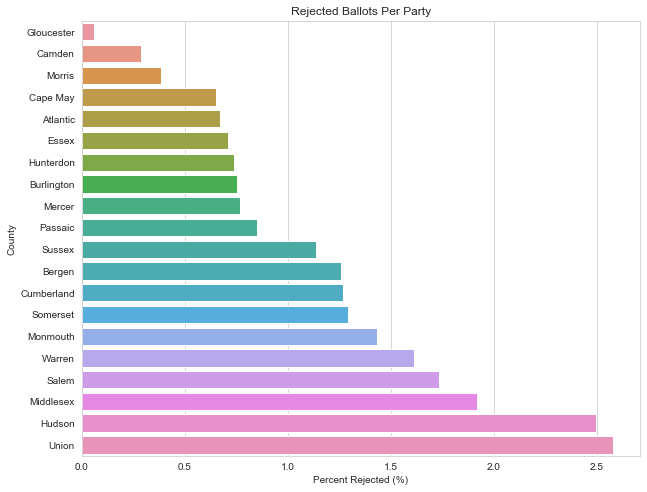

In [126]:
#graphing the rejection rates per Counties
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y='ballot_county', x='percent_rejected', data=county_df, ax = ax)
plot_var = ax.set(ylabel='County', xlabel='Percent Rejected (%)', title="Rejected Ballots Per Party")

In [127]:
clean_VBM

,voter_id,ballot_county,ballot_vtr_party,ballot_receivedDate,ballot_status,received_rejReason
0,P2763351335,Atlantic,Unaffiliated,10/23/2020,Accepted,NaN
1,P3919851339,Atlantic,Democratic,10/21/2020,Accepted,NaN
2,P6095651352,Atlantic,Republican,10/18/2020,Accepted,NaN
3,A1425851358,Atlantic,Democratic,NaN,Accepted,NaN
4,A1783751359,Atlantic,Democratic,NaN,Accepted,NaN
...,...,...,...,...,...,...
6047960,B6174726327,Warren,Unaffiliated,11/04/2020,Accepted,NaN
6047961,L1061243339,Warren,Democratic,11/03/2020,Accepted,NaN
6047962,C2754450078,Warren,Unaffiliated,10/28/2020,Accepted,NaN
6047963,H4507252594,Warren,Unaffiliated,10/27/2020,Accepted,NaN


In [77]:
party_df=pd.DataFrame(clean_VBM.groupby(['ballot_vtr_party','received_rejReason'])['ballot_county'].size()).reset_index()
party_df.columns = ['ballot_vtr_party','rejReason','rejCount']#.argmax()
party_df.groupby('ballot_vtr_party')['rejCount'].sum().sort_values(ascending=False)


ballot_vtr_party
Unaffiliated               19360
Democratic                 17823
Republican                  8841
U.S. Constitution Party      222
Conservative Party           208
Libertarian                  203
Green Party                  119
Socialist Party               94
Natural Law Party             89
Reform Party                  29
Name: rejCount, dtype: int64

In [83]:
#The ratio of rejections per party
party_df_percent=(((party_df.groupby('ballot_vtr_party')['rejCount'].sum().sort_values(ascending=False)/clean_VBM.ballot_vtr_party\
  .value_counts())*100).round(1)).reset_index()
party_df_percent.columns=['Party','Party_Affiliation%']
party_df_percent

,Party,Party_Affiliation%
0,Conservative Party,2.5
1,Democratic,1.0
2,Green Party,2.1
3,Libertarian,1.9
4,Natural Law Party,3.1
5,Reform Party,3.4
6,Republican,0.8
7,Socialist Party,3.0
8,U.S. Constitution Party,2.9
9,Unaffiliated,1.4


In [84]:
Other = ['Conservative Party', 'Green Party','Libertarian','Natural Law Party',\
                                            'Reform Party','Socialist Party',\
                                            'U.S. Constitution Party']
party_df_percent.Party = party_df_percent.Party.apply(lambda x: 'Other' if x in Other else x)

In [87]:
party_df_percent = party_df_percent.groupby('Party',as_index=False)['Party_Affiliation%'].sum()\
.sort_values(by="Party_Affiliation%",ascending=True)
party_df_percent

,Party,Party_Affiliation%
2,Republican,0.8
0,Democratic,1.0
3,Unaffiliated,1.4
1,Other,18.9


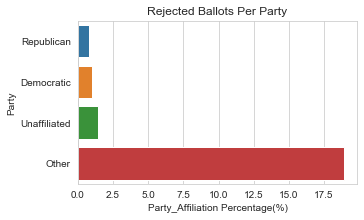

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(5,3))
sns.barplot(y='Party', x='Party_Affiliation%', data=party_df_percent, ax = ax)
plot_var = ax.set(ylabel='Party', xlabel='Party_Affiliation Percentage(%)', title="Rejected Ballots Per Party")